In [298]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
from shapely.geometry import Point
import missingno as msn
import seaborn as sns
import geopy
from geopy import distance
from geopy.distance import geodesic as dist

In [430]:
#Read in stadium data/coords
df = pd.read_excel('/Users/kylechonko/Documents/Python/AllFBS.ods')
#Drop 'coords' since it was reading in as a string
df.drop(['coords'], axis = 1, inplace = True)
#Add coordinates again, this time as a tuple
df['coords'] = list(zip(df.latitude, df.longitude))

In [432]:
#Read in Schedule Data
schedule = pd.read_excel('/Users/kylechonko/Documents/Python/NCAASchedule2024.ods')
#Drop and re-add coords to dataframe, since again reading in as a string
schedule.drop(['coords'], axis = 1, inplace = True)
schedule['coords'] = list(zip(df.latitude, df.longitude))
schedule = schedule[['team','conference', 'latitude','longitude','coords','Wk0','Wk1','Wk2','Wk3','Wk4','Wk5','Wk6','Wk7','Wk8','Wk9','Wk10','Wk11','Wk12','Wk13','Wk14','Wk15']]

In [434]:
#Create function to change all null values to the team name (since no travel for bye week)
def schedulechanger(df, col, team):
    for i in df.index:
        val = df[col].iloc[i]
        if pd.isna(val):
            df.at[i,col] = df.team[i]
        else:
            ()
    return df

schedulechanger(schedule, 'Wk0', 'team')
schedulechanger(schedule, 'Wk1', 'team')
schedulechanger(schedule, 'Wk2', 'team')
schedulechanger(schedule, 'Wk3', 'team')
schedulechanger(schedule, 'Wk4', 'team')
schedulechanger(schedule, 'Wk5', 'team')
schedulechanger(schedule, 'Wk6', 'team')
schedulechanger(schedule, 'Wk7', 'team')
schedulechanger(schedule, 'Wk8', 'team')
schedulechanger(schedule, 'Wk9', 'team')
schedulechanger(schedule, 'Wk10', 'team')
schedulechanger(schedule, 'Wk11', 'team')
schedulechanger(schedule, 'Wk12', 'team')
schedulechanger(schedule, 'Wk13', 'team')
schedulechanger(schedule, 'Wk14', 'team')
schedulechanger(schedule, 'Wk15', 'team')

,team,conference,latitude,longitude,coords,Wk0,Wk1,Wk2,Wk3,Wk4,...,Wk6,Wk7,Wk8,Wk9,Wk10,Wk11,Wk12,Wk13,Wk14,Wk15
0,Michigan,Big Ten,42.265869,-83.748726,"(42.2658687325174, -83.7487256526947)",Michigan,Michigan,Michigan,Michigan,Michigan,...,Washington,Michigan,Illinois,Michigan,Michigan,Indiana,Michigan,Michigan,Ohio State,Michigan
1,Penn State,Big Ten,40.812153,-77.856202,"(40.8121527327504, -77.8562021255493)",Penn State,West Virginia,Penn State,Penn State,Penn State,...,Penn State,Southern California,Penn State,Wisconsin,Penn State,Penn State,Purdue,Minnesota,Penn State,Penn State
2,Ohio State,Big Ten,40.001686,-83.019728,"(40.0016856893694, -83.0197280645371)",Ohio State,Ohio State,Ohio State,Ohio State,Ohio State,...,Ohio State,Oregon,Ohio State,Ohio State,Penn State,Ohio State,Northwestern,Ohio State,Ohio State,Ohio State
3,Texas A&M,SEC,30.610098,-96.340729,"(30.6100975781748, -96.3407292285928)",Texas A&M,Texas A&M,Texas A&M,Florida,Texas A&M,...,Texas A&M,Texas A&M,Mississippi State,Texas A&M,South Carolina,Texas A&M,Texas A&M,Auburn,Texas A&M,Texas A&M
4,Tennessee,SEC,35.954734,-83.925333,"(35.9547343726226, -83.9253330230713)",Tennessee,Tennessee,Charlotte,Tennessee,Oklahoma,...,Arkansas,Tennessee,Tennessee,Tennessee,Tennessee,Tennessee,Georgia,Tennessee,Vanderbilt,Tennessee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Liberty,C-USA,37.354414,-79.175047,"(37.354414, -79.175047)",Liberty,Liberty,New Mexico State,Liberty,Liberty,...,Liberty,Liberty,Liberty,Kennesaw State,Liberty,Middle Tennessee,UMass,Liberty,Sam Houston State,Liberty
130,Sam Houston State,C-USA,30.713947,-95.541916,"(30.7139467376334, -95.5419158935547)",Sam Houston State,Rice,UCF,Sam Houston State,Sam Houston State,...,UTEP,Sam Houston State,Sam Houston State,FIU,Sam Houston State,Sam Houston State,Kennesaw State,Jacksonville State,Sam Houston State,Sam Houston State
131,Coastal Carolina,Sun Belt,33.792838,-79.017023,"(33.7928381752245, -79.0170228280526)",Coastal Carolina,Jacksonville State,Coastal Carolina,Temple,Coastal Carolina,...,Coastal Carolina,James Madison,Coastal Carolina,Coastal Carolina,Troy,Coastal Carolina,Marshall,Coastal Carolina,Georgia State,Coastal Carolina
132,Kennesaw State,C-USA,34.023434,-84.615490,"(34.0234337, -84.6154897)",Kennesaw State,UTSA,Kennesaw State,San Jose State,Kennesaw State,...,Kennesaw State,Kennesaw State,Middle Tennessee,Kennesaw State,Western Kentucky,UTEP,Kennesaw State,Kennesaw State,Louisiana Tech,Kennesaw State


In [436]:
#Create Dictionary containing all stadium coordinates
coords_dict = dict(zip(df.team, df.coords))
lat_dict = dict(zip(df.team, df.latitude))
long_dict = dict(zip(df.team, df.longitude))

In [438]:
#Break up school name into latitude and longitude (so we can swap them out with the dictionaries we created earlier)
schedule2 = schedule[['team','conference','latitude','longitude','coords','Wk0','Wk0','Wk1','Wk1','Wk2','Wk2','Wk3','Wk3','Wk4','Wk4','Wk5','Wk5','Wk6','Wk6','Wk7','Wk7','Wk8','Wk8','Wk9','Wk9','Wk10','Wk10','Wk11','Wk11','Wk12','Wk12','Wk13','Wk13','Wk14','Wk14','Wk15','Wk15']]
schedule2.columns = ['team','conference','latitude','longitude','coords','Wk0lat','Wk0long','Wk1lat','Wk1long','Wk2lat','Wk2long','Wk3lat','Wk3long','Wk4lat','Wk4long','Wk5lat','Wk5long','Wk6lat','Wk6long','Wk7lat','Wk7long','Wk8lat','Wk8long','Wk9lat','Wk9long','Wk10lat','Wk10long','Wk11lat','Wk11long','Wk12lat','Wk12long','Wk13lat','Wk13long','Wk14lat','Wk14long','Wk15lat','Wk15long']


In [440]:
#Turn School Names into Latitude and Longitude
schedule2['Wk0lat'].replace(lat_dict, inplace = True)
schedule2['Wk0long'].replace(long_dict, inplace =True)
schedule2['Wk1lat'].replace(lat_dict, inplace = True)
schedule2['Wk1long'].replace(long_dict, inplace =True)
schedule2['Wk2lat'].replace(lat_dict, inplace = True)
schedule2['Wk2long'].replace(long_dict, inplace =True)
schedule2['Wk3lat'].replace(lat_dict, inplace = True)
schedule2['Wk3long'].replace(long_dict, inplace =True)
schedule2['Wk4lat'].replace(lat_dict, inplace = True)
schedule2['Wk4long'].replace(long_dict, inplace =True)
schedule2['Wk5lat'].replace(lat_dict, inplace = True)
schedule2['Wk5long'].replace(long_dict, inplace =True)
schedule2['Wk6lat'].replace(lat_dict, inplace = True)
schedule2['Wk6long'].replace(long_dict, inplace =True)
schedule2['Wk7lat'].replace(lat_dict, inplace = True)
schedule2['Wk7long'].replace(long_dict, inplace =True)
schedule2['Wk8lat'].replace(lat_dict, inplace = True)
schedule2['Wk8long'].replace(long_dict, inplace =True)
schedule2['Wk9lat'].replace(lat_dict, inplace = True)
schedule2['Wk9long'].replace(long_dict, inplace =True)
schedule2['Wk10lat'].replace(lat_dict, inplace = True)
schedule2['Wk10long'].replace(long_dict, inplace =True)
schedule2['Wk11lat'].replace(lat_dict, inplace = True)
schedule2['Wk11long'].replace(long_dict, inplace =True)
schedule2['Wk12lat'].replace(lat_dict, inplace = True)
schedule2['Wk12long'].replace(long_dict, inplace =True)
schedule2['Wk13lat'].replace(lat_dict, inplace = True)
schedule2['Wk13long'].replace(long_dict, inplace =True)
schedule2['Wk14lat'].replace(lat_dict, inplace = True)
schedule2['Wk14long'].replace(long_dict, inplace =True)
schedule2['Wk15lat'].replace(lat_dict, inplace = True)
schedule2['Wk15long'].replace(long_dict, inplace =True)

/var/folders/6p/v9rm9dqj4xq8113by2w3q15m0000gn/T/ipykernel_20020/1286093504.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  schedule2['Wk0lat'].replace(lat_dict, inplace = True)
/var/folders/6p/v9rm9dqj4xq8113by2w3q15m0000gn/T/ipykernel_20020/1286093504.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting',

In [442]:
#Zip the lats and longs for each stadium into a tuple for each week
schedule3 = schedule2
schedule3['wk0'] = list(zip(schedule3.Wk0lat, schedule3.Wk0long))
schedule3['wk1'] = list(zip(schedule3.Wk1lat, schedule3.Wk1long))
schedule3['wk2'] = list(zip(schedule3.Wk2lat, schedule3.Wk2long))
schedule3['wk3'] = list(zip(schedule3.Wk3lat, schedule3.Wk3long))
schedule3['wk4'] = list(zip(schedule3.Wk4lat, schedule3.Wk4long))
schedule3['wk5'] = list(zip(schedule3.Wk5lat, schedule3.Wk5long))
schedule3['wk6'] = list(zip(schedule3.Wk6lat, schedule3.Wk6long))
schedule3['wk7'] = list(zip(schedule3.Wk7lat, schedule3.Wk7long))
schedule3['wk8'] = list(zip(schedule3.Wk8lat, schedule3.Wk8long))
schedule3['wk9'] = list(zip(schedule3.Wk9lat, schedule3.Wk9long))
schedule3['wk10'] = list(zip(schedule3.Wk10lat, schedule3.Wk10long))
schedule3['wk11'] = list(zip(schedule3.Wk11lat, schedule3.Wk11long))
schedule3['wk12'] = list(zip(schedule3.Wk12lat, schedule3.Wk12long))
schedule3['wk13'] = list(zip(schedule3.Wk13lat, schedule3.Wk13long))
schedule3['wk14'] = list(zip(schedule3.Wk14lat, schedule3.Wk14long))
schedule3['wk15'] = list(zip(schedule3.Wk15lat, schedule3.Wk15long))
#Drop the 'wkXXlat' and 'wkXXlong' from the dataframe
schedule3 = schedule3[['team', 'conference','coords','wk0','wk1','wk2','wk3','wk4','wk5','wk6','wk7','wk8','wk9','wk10','wk11','wk12','wk13','wk14','wk15']]

/var/folders/6p/v9rm9dqj4xq8113by2w3q15m0000gn/T/ipykernel_20020/1508714374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schedule3['wk0'] = list(zip(schedule3.Wk0lat, schedule3.Wk0long))
/var/folders/6p/v9rm9dqj4xq8113by2w3q15m0000gn/T/ipykernel_20020/1508714374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schedule3['wk1'] = list(zip(schedule3.Wk1lat, schedule3.Wk1long))
/var/folders/6p/v9rm9dqj4xq8113by2w3q15m0000gn/T/ipykernel_20020/1508714374.py:5: SettingWithCopyWarning: 
A value is trying

In [486]:
#Create blank columns to store each distance traveled per week
schedule3['wk0travel'] = ''
schedule3['wk1travel'] = ''
schedule3['wk2travel'] = ''
schedule3['wk3travel'] = ''
schedule3['wk4travel'] = ''
schedule3['wk5travel'] = ''
schedule3['wk6travel'] = ''
schedule3['wk7travel'] = ''
schedule3['wk8travel'] = ''
schedule3['wk9travel'] = ''
schedule3['wk10travel'] = ''
schedule3['wk11travel'] = ''
schedule3['wk12travel'] = ''
schedule3['wk13travel'] = ''
schedule3['wk14travel'] = ''
schedule3['wk15travel'] = ''

#Find the distances traveled by each team every week
for i in range(0, len(schedule3)):
    schedule3.wk0travel.iloc[i] = round((dist(schedule3.iloc[i]['coords'], schedule3.iloc[i]['wk0']).mi),2)
    schedule3.wk1travel.iloc[i] = round((dist(schedule3.iloc[i]['coords'], schedule3.iloc[i]['wk1']).mi),2)
    schedule3.wk2travel.iloc[i] = round((dist(schedule3.iloc[i]['coords'], schedule3.iloc[i]['wk2']).mi),2)
    schedule3.wk3travel.iloc[i] = round((dist(schedule3.iloc[i]['coords'], schedule3.iloc[i]['wk3']).mi),2)
    schedule3.wk4travel.iloc[i] = round((dist(schedule3.iloc[i]['coords'], schedule3.iloc[i]['wk4']).mi),2)
    schedule3.wk5travel.iloc[i] = round((dist(schedule3.iloc[i]['coords'], schedule3.iloc[i]['wk5']).mi),2)
    schedule3.wk6travel.iloc[i] = round((dist(schedule3.iloc[i]['coords'], schedule3.iloc[i]['wk6']).mi),2)
    schedule3.wk7travel.iloc[i] = round((dist(schedule3.iloc[i]['coords'], schedule3.iloc[i]['wk7']).mi),2)
    schedule3.wk8travel.iloc[i] = round((dist(schedule3.iloc[i]['coords'], schedule3.iloc[i]['wk8']).mi),2)
    schedule3.wk9travel.iloc[i] = round((dist(schedule3.iloc[i]['coords'], schedule3.iloc[i]['wk9']).mi),2)
    schedule3.wk10travel.iloc[i] = round((dist(schedule3.iloc[i]['coords'], schedule3.iloc[i]['wk10']).mi),2)
    schedule3.wk11travel.iloc[i] = round((dist(schedule3.iloc[i]['coords'], schedule3.iloc[i]['wk11']).mi),2)
    schedule3.wk12travel.iloc[i] = round((dist(schedule3.iloc[i]['coords'], schedule3.iloc[i]['wk12']).mi),2)
    schedule3.wk13travel.iloc[i] = round((dist(schedule3.iloc[i]['coords'], schedule3.iloc[i]['wk13']).mi),2)
    schedule3.wk14travel.iloc[i] = round((dist(schedule3.iloc[i]['coords'], schedule3.iloc[i]['wk14']).mi),2)
    schedule3.wk15travel.iloc[i] = round((dist(schedule3.iloc[i]['coords'], schedule3.iloc[i]['wk15']).mi),2)

/var/folders/6p/v9rm9dqj4xq8113by2w3q15m0000gn/T/ipykernel_20020/1618756555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schedule3['wk0travel'] = ''
/var/folders/6p/v9rm9dqj4xq8113by2w3q15m0000gn/T/ipykernel_20020/1618756555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schedule3['wk1travel'] = ''
/var/folders/6p/v9rm9dqj4xq8113by2w3q15m0000gn/T/ipykernel_20020/1618756555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [488]:
#Create dataframe with team, conference, and sum of total travel *2 (to account for round trip distance))
travel = schedule3.iloc[:, [0,1,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]]
cols = ['wk0travel','wk1travel','wk2travel','wk3travel','wk4travel','wk5travel','wk6travel','wk7travel','wk8travel','wk9travel','wk10travel','wk11travel','wk12travel','wk13travel','wk14travel','wk15travel']
travel['travelSum'] = round(travel[cols].sum(axis = 1)*2, 2)
travel = travel[['team','conference','travelSum']]
travel

/var/folders/6p/v9rm9dqj4xq8113by2w3q15m0000gn/T/ipykernel_20020/1028417824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel['travelSum'] = round(travel[cols].sum(axis = 1)*2, 2)


,team,conference,travelSum
0,Michigan,Big Ten,5204.54
1,Penn State,Big Ten,8621.4
2,Ohio State,Big Ten,5645.44
3,Texas A&M,SEC,5806.72
4,Tennessee,SEC,3649.86
...,...,...,...
129,Liberty,C-USA,8184.3
130,Sam Houston State,C-USA,7879.12
131,Coastal Carolina,Sun Belt,4576.7
132,Kennesaw State,C-USA,10230.5


In [494]:
#Find top 20 and bottom 20 teams in terms of miles traveled
traveltop20 = travel.sort_values(by = 'travelSum', ascending = False).head(20)
travelbtm20 = travel.sort_values(by = 'travelSum', ascending = True).head(20)

In [496]:
traveltop20

,team,conference,travelSum
59,Hawaii,Mountain West,29814.04
10,UCLA,Big Ten,22091.02
35,California,ACC,20699.64
62,Stanford,ACC,17995.04
8,Southern California,Big Ten,13993.32
14,Florida State,ACC,13950.4
103,Nevada,Mountain West,13646.04
81,Boise State,Mountain West,13613.5
83,UNLV,Mountain West,13275.0
78,New Mexico,Mountain West,13030.0


In [498]:
travelbtm20

,team,conference,travelSum
117,Miami (OH),MAC,1922.88
16,Clemson,ACC,2474.42
12,Auburn,SEC,2479.62
119,Ohio,MAC,2677.42
115,Kent State,MAC,2803.9
101,Western Michigan,MAC,2872.5
74,Vanderbilt,SEC,2958.4
21,Arkansas,SEC,3115.7
39,Virginia,ACC,3155.94
112,Toledo,MAC,3358.0


Text(0.5, 0, 'Conference')

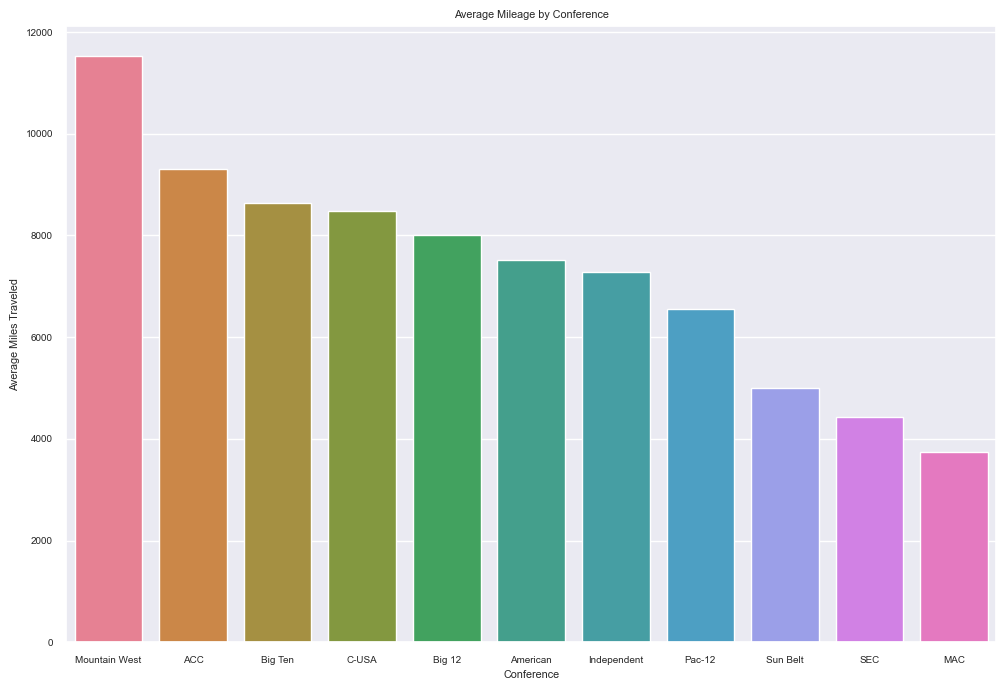

In [464]:
#Plot average mileage by conference
conferences = pd.DataFrame(travel.groupby('conference')['travelSum'].mean().sort_values(ascending = False))
conferences
plt.figure(figsize = (12,8))
sns.barplot(conferences, x = 'conference', y = 'travelSum', hue = 'conference')
plt.title('Average Mileage by Conference')
plt.ylabel('Average Miles Traveled')
plt.xlabel('Conference')

<Axes: title={'center': '20 Highest-Traveling Schools, in Miles'}, xlabel='School', ylabel='Miles Traveled'>

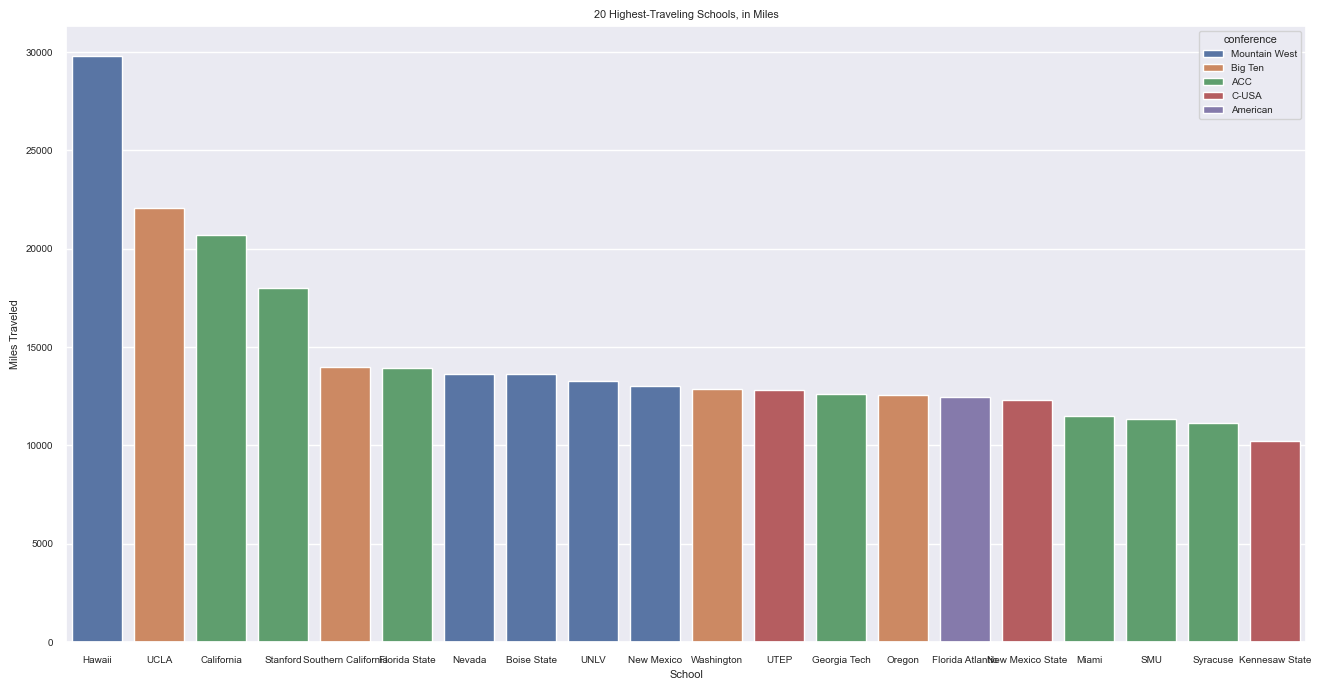

In [466]:
#Plot 20 highest travelers
plt.figure(figsize = (16,8))
sns.set(font_scale = 0.65)
plt.title('20 Highest-Traveling Schools, in Miles')
plt.xlabel('School', fontsize = 8)
plt.ylabel('Miles Traveled')
sns.barplot(traveltop20, x = 'team', y = 'travelSum', hue = 'conference')

<Axes: title={'center': '20 Lowest-Traveling Schools, in Miles'}, xlabel='School', ylabel='Miles Traveled'>

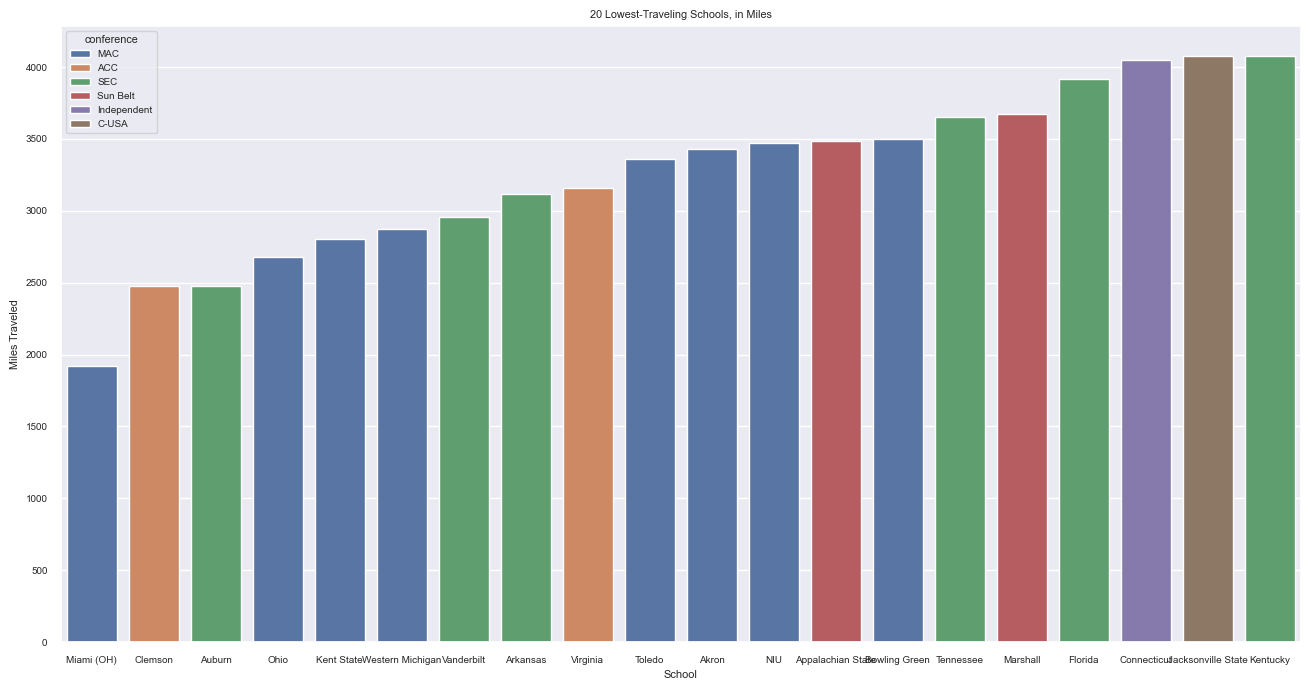

In [470]:
#Plot 20 lowest travelers
plt.figure(figsize = (16,8))
plt.title('20 Lowest-Traveling Schools, in Miles')
sns.set(font_scale = 0.65)
plt.xlabel('School', fontsize = 8)
plt.ylabel('Miles Traveled')
sns.barplot(travelbtm20, x = 'team', y = 'travelSum', hue = 'conference')